# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [4]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

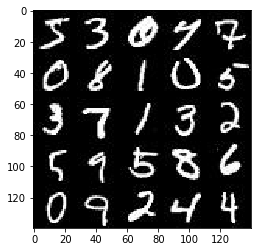

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

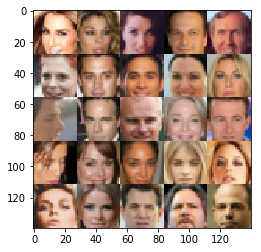

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/anaconda/envs/DeepLearning/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [8]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_inputs, z_inputs, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [9]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.1461... Generator Loss: 1.0810
Epoch 1/2... Discriminator Loss: 2.5740... Generator Loss: 0.1946
Epoch 1/2... Discriminator Loss: 0.1345... Generator Loss: 3.7956
Epoch 1/2... Discriminator Loss: 0.4639... Generator Loss: 1.3044
Epoch 1/2... Discriminator Loss: 1.1129... Generator Loss: 1.0258
Epoch 1/2... Discriminator Loss: 0.9030... Generator Loss: 1.3968
Epoch 1/2... Discriminator Loss: 0.9442... Generator Loss: 10.8201
Epoch 1/2... Discriminator Loss: 2.0178... Generator Loss: 8.8807
Epoch 1/2... Discriminator Loss: 0.8017... Generator Loss: 1.5463
Epoch 1/2... Discriminator Loss: 0.6659... Generator Loss: 1.0704


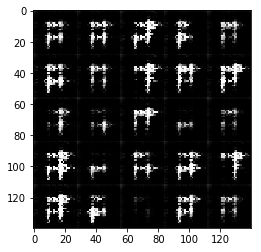

Epoch 1/2... Discriminator Loss: 0.1995... Generator Loss: 3.8093
Epoch 1/2... Discriminator Loss: 0.8398... Generator Loss: 3.2032
Epoch 1/2... Discriminator Loss: 0.1650... Generator Loss: 3.3323
Epoch 1/2... Discriminator Loss: 0.4692... Generator Loss: 3.3131
Epoch 1/2... Discriminator Loss: 0.2385... Generator Loss: 4.3178
Epoch 1/2... Discriminator Loss: 1.2585... Generator Loss: 0.6207
Epoch 1/2... Discriminator Loss: 0.2055... Generator Loss: 3.9587
Epoch 1/2... Discriminator Loss: 0.7497... Generator Loss: 1.7270
Epoch 1/2... Discriminator Loss: 0.2955... Generator Loss: 3.4200
Epoch 1/2... Discriminator Loss: 2.3023... Generator Loss: 6.1235


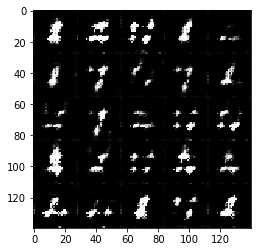

Epoch 1/2... Discriminator Loss: 0.5051... Generator Loss: 2.1516
Epoch 1/2... Discriminator Loss: 0.8892... Generator Loss: 1.1663
Epoch 1/2... Discriminator Loss: 0.3149... Generator Loss: 2.6694
Epoch 1/2... Discriminator Loss: 1.2078... Generator Loss: 0.6198
Epoch 1/2... Discriminator Loss: 0.4881... Generator Loss: 2.2444
Epoch 1/2... Discriminator Loss: 0.4102... Generator Loss: 2.3537
Epoch 1/2... Discriminator Loss: 0.5101... Generator Loss: 1.5477
Epoch 1/2... Discriminator Loss: 1.8427... Generator Loss: 0.3300
Epoch 1/2... Discriminator Loss: 1.1305... Generator Loss: 0.6248
Epoch 1/2... Discriminator Loss: 0.3905... Generator Loss: 2.6095


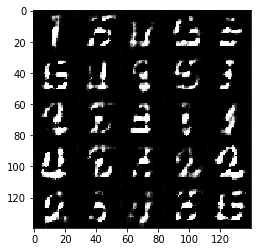

Epoch 1/2... Discriminator Loss: 1.2525... Generator Loss: 4.1174
Epoch 1/2... Discriminator Loss: 1.2378... Generator Loss: 0.5342
Epoch 1/2... Discriminator Loss: 0.6645... Generator Loss: 2.3744
Epoch 1/2... Discriminator Loss: 1.0191... Generator Loss: 0.8935
Epoch 1/2... Discriminator Loss: 1.4636... Generator Loss: 5.4880
Epoch 1/2... Discriminator Loss: 0.5624... Generator Loss: 1.2612
Epoch 1/2... Discriminator Loss: 1.3742... Generator Loss: 0.6885
Epoch 1/2... Discriminator Loss: 0.4187... Generator Loss: 2.3928
Epoch 1/2... Discriminator Loss: 1.6060... Generator Loss: 0.3734
Epoch 1/2... Discriminator Loss: 0.8405... Generator Loss: 1.8978


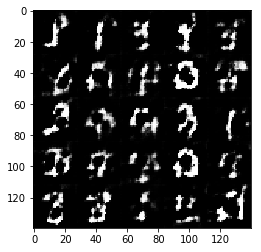

Epoch 1/2... Discriminator Loss: 0.5739... Generator Loss: 1.5313
Epoch 1/2... Discriminator Loss: 0.7916... Generator Loss: 1.1998
Epoch 1/2... Discriminator Loss: 0.8660... Generator Loss: 0.9535
Epoch 1/2... Discriminator Loss: 1.7422... Generator Loss: 0.2955
Epoch 1/2... Discriminator Loss: 1.3727... Generator Loss: 0.6156
Epoch 1/2... Discriminator Loss: 1.1101... Generator Loss: 1.0354
Epoch 1/2... Discriminator Loss: 0.8592... Generator Loss: 2.6861
Epoch 1/2... Discriminator Loss: 0.9565... Generator Loss: 1.2272
Epoch 1/2... Discriminator Loss: 0.6215... Generator Loss: 1.8828
Epoch 1/2... Discriminator Loss: 0.7822... Generator Loss: 1.0794


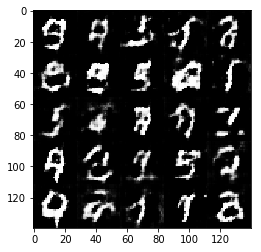

Epoch 1/2... Discriminator Loss: 1.0419... Generator Loss: 1.5576
Epoch 1/2... Discriminator Loss: 1.0765... Generator Loss: 0.8774
Epoch 1/2... Discriminator Loss: 0.9090... Generator Loss: 1.0196
Epoch 1/2... Discriminator Loss: 0.9233... Generator Loss: 1.9543
Epoch 1/2... Discriminator Loss: 0.7579... Generator Loss: 1.1063
Epoch 1/2... Discriminator Loss: 0.8360... Generator Loss: 1.5069
Epoch 1/2... Discriminator Loss: 1.0830... Generator Loss: 0.5558
Epoch 1/2... Discriminator Loss: 0.8700... Generator Loss: 1.1018
Epoch 1/2... Discriminator Loss: 0.8987... Generator Loss: 2.6645
Epoch 1/2... Discriminator Loss: 0.7888... Generator Loss: 1.0052


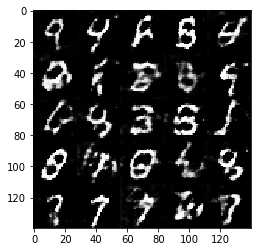

Epoch 1/2... Discriminator Loss: 0.8579... Generator Loss: 1.1349
Epoch 1/2... Discriminator Loss: 0.7372... Generator Loss: 1.3147
Epoch 1/2... Discriminator Loss: 0.8507... Generator Loss: 1.1505
Epoch 1/2... Discriminator Loss: 0.6266... Generator Loss: 1.9148
Epoch 1/2... Discriminator Loss: 0.9067... Generator Loss: 1.4005
Epoch 1/2... Discriminator Loss: 0.5512... Generator Loss: 2.1044
Epoch 1/2... Discriminator Loss: 0.7977... Generator Loss: 1.0024
Epoch 1/2... Discriminator Loss: 1.1960... Generator Loss: 0.6114
Epoch 1/2... Discriminator Loss: 0.6422... Generator Loss: 1.1397
Epoch 1/2... Discriminator Loss: 1.0972... Generator Loss: 2.7079


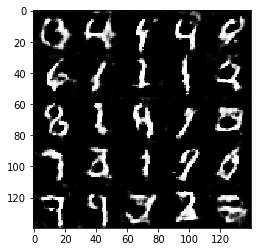

Epoch 1/2... Discriminator Loss: 1.3992... Generator Loss: 0.5548
Epoch 1/2... Discriminator Loss: 0.9151... Generator Loss: 1.1298
Epoch 1/2... Discriminator Loss: 0.8077... Generator Loss: 1.2826
Epoch 1/2... Discriminator Loss: 1.2609... Generator Loss: 3.0785
Epoch 1/2... Discriminator Loss: 1.1713... Generator Loss: 0.6329
Epoch 1/2... Discriminator Loss: 0.8507... Generator Loss: 1.0134
Epoch 1/2... Discriminator Loss: 1.0933... Generator Loss: 3.5138
Epoch 1/2... Discriminator Loss: 0.9490... Generator Loss: 1.6542
Epoch 1/2... Discriminator Loss: 1.1154... Generator Loss: 0.6795
Epoch 1/2... Discriminator Loss: 0.9368... Generator Loss: 1.9256


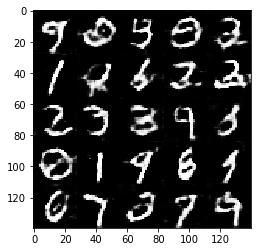

Epoch 1/2... Discriminator Loss: 1.0305... Generator Loss: 0.6840
Epoch 1/2... Discriminator Loss: 0.8182... Generator Loss: 1.2230
Epoch 1/2... Discriminator Loss: 0.8348... Generator Loss: 1.2573
Epoch 1/2... Discriminator Loss: 1.3005... Generator Loss: 0.5983
Epoch 1/2... Discriminator Loss: 0.9756... Generator Loss: 1.3050
Epoch 1/2... Discriminator Loss: 1.6667... Generator Loss: 0.4789
Epoch 1/2... Discriminator Loss: 1.5157... Generator Loss: 2.2635
Epoch 1/2... Discriminator Loss: 0.7709... Generator Loss: 1.0405
Epoch 1/2... Discriminator Loss: 0.9016... Generator Loss: 1.0972
Epoch 1/2... Discriminator Loss: 1.5675... Generator Loss: 0.3680


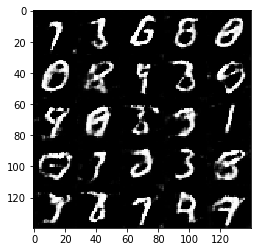

Epoch 1/2... Discriminator Loss: 1.9670... Generator Loss: 3.1522
Epoch 1/2... Discriminator Loss: 0.9035... Generator Loss: 1.0155
Epoch 1/2... Discriminator Loss: 1.5970... Generator Loss: 0.3033
Epoch 2/2... Discriminator Loss: 1.3510... Generator Loss: 0.4240
Epoch 2/2... Discriminator Loss: 0.9917... Generator Loss: 1.0133
Epoch 2/2... Discriminator Loss: 0.8585... Generator Loss: 1.0031
Epoch 2/2... Discriminator Loss: 0.9323... Generator Loss: 1.5801
Epoch 2/2... Discriminator Loss: 0.7903... Generator Loss: 1.4806
Epoch 2/2... Discriminator Loss: 0.9022... Generator Loss: 0.9764
Epoch 2/2... Discriminator Loss: 1.2750... Generator Loss: 0.6641


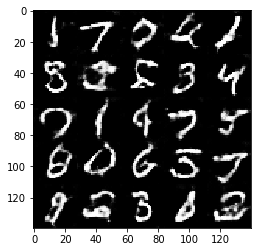

Epoch 2/2... Discriminator Loss: 0.8005... Generator Loss: 1.1352
Epoch 2/2... Discriminator Loss: 0.8417... Generator Loss: 0.9707
Epoch 2/2... Discriminator Loss: 0.9224... Generator Loss: 0.9763
Epoch 2/2... Discriminator Loss: 0.9257... Generator Loss: 0.9405
Epoch 2/2... Discriminator Loss: 1.0974... Generator Loss: 0.8617
Epoch 2/2... Discriminator Loss: 1.0288... Generator Loss: 0.7471
Epoch 2/2... Discriminator Loss: 0.8886... Generator Loss: 0.9431
Epoch 2/2... Discriminator Loss: 1.2528... Generator Loss: 0.5578
Epoch 2/2... Discriminator Loss: 1.4801... Generator Loss: 0.4042
Epoch 2/2... Discriminator Loss: 1.0765... Generator Loss: 0.7067


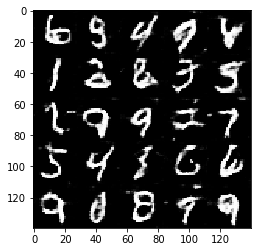

Epoch 2/2... Discriminator Loss: 0.8176... Generator Loss: 1.5953
Epoch 2/2... Discriminator Loss: 0.8283... Generator Loss: 1.1580
Epoch 2/2... Discriminator Loss: 1.0166... Generator Loss: 0.6413
Epoch 2/2... Discriminator Loss: 0.9097... Generator Loss: 1.5393
Epoch 2/2... Discriminator Loss: 0.9484... Generator Loss: 0.8654
Epoch 2/2... Discriminator Loss: 1.0010... Generator Loss: 1.0906
Epoch 2/2... Discriminator Loss: 0.8421... Generator Loss: 0.8674
Epoch 2/2... Discriminator Loss: 1.9836... Generator Loss: 0.2795
Epoch 2/2... Discriminator Loss: 0.9318... Generator Loss: 0.9607
Epoch 2/2... Discriminator Loss: 0.8714... Generator Loss: 1.0111


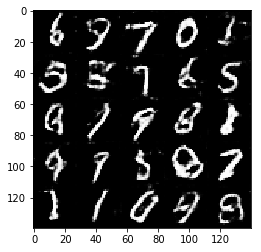

Epoch 2/2... Discriminator Loss: 1.0864... Generator Loss: 0.8847
Epoch 2/2... Discriminator Loss: 1.1111... Generator Loss: 1.2628
Epoch 2/2... Discriminator Loss: 0.8754... Generator Loss: 1.2951
Epoch 2/2... Discriminator Loss: 0.8960... Generator Loss: 0.8677
Epoch 2/2... Discriminator Loss: 1.3121... Generator Loss: 2.0596
Epoch 2/2... Discriminator Loss: 0.9986... Generator Loss: 1.1091
Epoch 2/2... Discriminator Loss: 1.6960... Generator Loss: 0.2994
Epoch 2/2... Discriminator Loss: 1.2790... Generator Loss: 0.5777
Epoch 2/2... Discriminator Loss: 1.2331... Generator Loss: 0.5910
Epoch 2/2... Discriminator Loss: 1.9233... Generator Loss: 0.2366


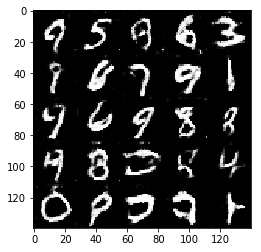

Epoch 2/2... Discriminator Loss: 1.8417... Generator Loss: 0.3030
Epoch 2/2... Discriminator Loss: 1.8634... Generator Loss: 2.0307
Epoch 2/2... Discriminator Loss: 0.8830... Generator Loss: 0.8010
Epoch 2/2... Discriminator Loss: 1.6719... Generator Loss: 0.3447
Epoch 2/2... Discriminator Loss: 1.0772... Generator Loss: 1.1828
Epoch 2/2... Discriminator Loss: 1.1282... Generator Loss: 1.6260
Epoch 2/2... Discriminator Loss: 0.8338... Generator Loss: 0.9978
Epoch 2/2... Discriminator Loss: 1.1108... Generator Loss: 0.5795
Epoch 2/2... Discriminator Loss: 0.7910... Generator Loss: 1.0751
Epoch 2/2... Discriminator Loss: 1.1511... Generator Loss: 2.4351


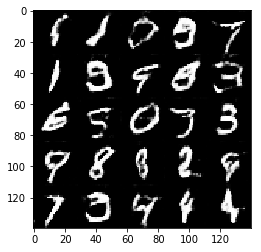

Epoch 2/2... Discriminator Loss: 0.9683... Generator Loss: 1.6123
Epoch 2/2... Discriminator Loss: 0.8058... Generator Loss: 2.1776
Epoch 2/2... Discriminator Loss: 1.2924... Generator Loss: 0.5388
Epoch 2/2... Discriminator Loss: 0.8277... Generator Loss: 0.9040
Epoch 2/2... Discriminator Loss: 1.0286... Generator Loss: 0.7250
Epoch 2/2... Discriminator Loss: 1.5290... Generator Loss: 0.4757
Epoch 2/2... Discriminator Loss: 1.1502... Generator Loss: 0.5842
Epoch 2/2... Discriminator Loss: 1.0213... Generator Loss: 0.7035
Epoch 2/2... Discriminator Loss: 0.4140... Generator Loss: 2.0804
Epoch 2/2... Discriminator Loss: 0.9525... Generator Loss: 0.7719


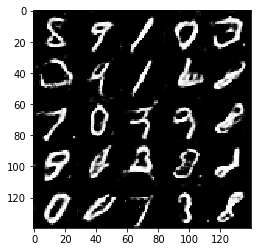

Epoch 2/2... Discriminator Loss: 0.9449... Generator Loss: 0.8388
Epoch 2/2... Discriminator Loss: 1.0886... Generator Loss: 0.9349
Epoch 2/2... Discriminator Loss: 0.6308... Generator Loss: 1.9594
Epoch 2/2... Discriminator Loss: 0.7772... Generator Loss: 1.1289
Epoch 2/2... Discriminator Loss: 0.6410... Generator Loss: 1.2269
Epoch 2/2... Discriminator Loss: 1.3092... Generator Loss: 0.4849
Epoch 2/2... Discriminator Loss: 1.8475... Generator Loss: 0.3427
Epoch 2/2... Discriminator Loss: 0.8633... Generator Loss: 0.8492
Epoch 2/2... Discriminator Loss: 1.2766... Generator Loss: 0.6046
Epoch 2/2... Discriminator Loss: 0.8911... Generator Loss: 0.9243


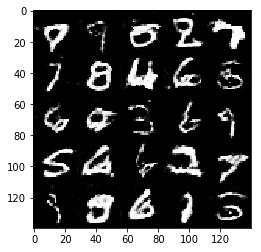

Epoch 2/2... Discriminator Loss: 1.4940... Generator Loss: 0.4322
Epoch 2/2... Discriminator Loss: 0.9517... Generator Loss: 1.6143
Epoch 2/2... Discriminator Loss: 0.9477... Generator Loss: 2.9347
Epoch 2/2... Discriminator Loss: 1.5783... Generator Loss: 1.6620
Epoch 2/2... Discriminator Loss: 1.0283... Generator Loss: 1.7234
Epoch 2/2... Discriminator Loss: 0.7422... Generator Loss: 1.2710
Epoch 2/2... Discriminator Loss: 0.5988... Generator Loss: 1.2062
Epoch 2/2... Discriminator Loss: 0.8435... Generator Loss: 0.9839
Epoch 2/2... Discriminator Loss: 1.4161... Generator Loss: 0.4920
Epoch 2/2... Discriminator Loss: 2.5502... Generator Loss: 0.1635


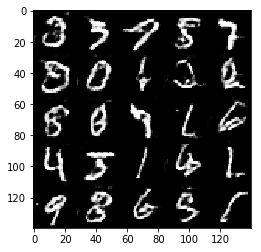

Epoch 2/2... Discriminator Loss: 1.3971... Generator Loss: 0.4678
Epoch 2/2... Discriminator Loss: 1.6074... Generator Loss: 0.3599
Epoch 2/2... Discriminator Loss: 1.2652... Generator Loss: 0.6173
Epoch 2/2... Discriminator Loss: 1.1324... Generator Loss: 2.2499
Epoch 2/2... Discriminator Loss: 0.6874... Generator Loss: 2.1032
Epoch 2/2... Discriminator Loss: 0.8854... Generator Loss: 0.8154
Epoch 2/2... Discriminator Loss: 0.6408... Generator Loss: 2.1356
Epoch 2/2... Discriminator Loss: 1.2017... Generator Loss: 0.5823
Epoch 2/2... Discriminator Loss: 0.6180... Generator Loss: 1.3175
Epoch 2/2... Discriminator Loss: 1.2927... Generator Loss: 0.7363


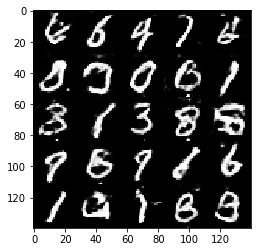

Epoch 2/2... Discriminator Loss: 1.0736... Generator Loss: 0.7611
Epoch 2/2... Discriminator Loss: 1.8320... Generator Loss: 0.2644
Epoch 2/2... Discriminator Loss: 1.0935... Generator Loss: 0.6495
Epoch 2/2... Discriminator Loss: 1.2406... Generator Loss: 0.4922
Epoch 2/2... Discriminator Loss: 1.8259... Generator Loss: 0.3981
Epoch 2/2... Discriminator Loss: 1.4890... Generator Loss: 1.4712
Epoch 2/2... Discriminator Loss: 1.0206... Generator Loss: 0.7712


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.1087... Generator Loss: 0.2462
Epoch 1/1... Discriminator Loss: 0.5711... Generator Loss: 5.3077
Epoch 1/1... Discriminator Loss: 0.3389... Generator Loss: 1.5087
Epoch 1/1... Discriminator Loss: 0.3670... Generator Loss: 13.4017
Epoch 1/1... Discriminator Loss: 0.3088... Generator Loss: 3.1135
Epoch 1/1... Discriminator Loss: 0.2444... Generator Loss: 3.4053
Epoch 1/1... Discriminator Loss: 0.1712... Generator Loss: 2.5928
Epoch 1/1... Discriminator Loss: 0.2558... Generator Loss: 3.5077
Epoch 1/1... Discriminator Loss: 0.2053... Generator Loss: 5.1234
Epoch 1/1... Discriminator Loss: 0.8848... Generator Loss: 4.9888


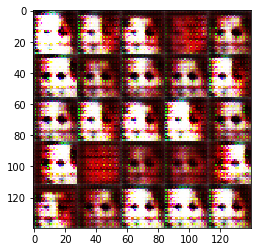

Epoch 1/1... Discriminator Loss: 0.1168... Generator Loss: 3.2289
Epoch 1/1... Discriminator Loss: 2.0664... Generator Loss: 0.4212
Epoch 1/1... Discriminator Loss: 0.2387... Generator Loss: 2.6639
Epoch 1/1... Discriminator Loss: 0.8628... Generator Loss: 0.7802
Epoch 1/1... Discriminator Loss: 0.4311... Generator Loss: 1.7422
Epoch 1/1... Discriminator Loss: 0.0987... Generator Loss: 2.9595
Epoch 1/1... Discriminator Loss: 0.2377... Generator Loss: 3.5738
Epoch 1/1... Discriminator Loss: 0.0678... Generator Loss: 4.5929
Epoch 1/1... Discriminator Loss: 0.2687... Generator Loss: 1.8105
Epoch 1/1... Discriminator Loss: 0.9569... Generator Loss: 1.5400


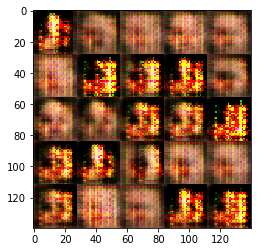

Epoch 1/1... Discriminator Loss: 0.4470... Generator Loss: 1.9187
Epoch 1/1... Discriminator Loss: 1.8266... Generator Loss: 0.2660
Epoch 1/1... Discriminator Loss: 0.4973... Generator Loss: 2.4985
Epoch 1/1... Discriminator Loss: 0.2192... Generator Loss: 2.1157
Epoch 1/1... Discriminator Loss: 0.5750... Generator Loss: 1.1856
Epoch 1/1... Discriminator Loss: 6.6769... Generator Loss: 9.0406
Epoch 1/1... Discriminator Loss: 0.9086... Generator Loss: 1.0757
Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.9321
Epoch 1/1... Discriminator Loss: 0.5445... Generator Loss: 1.8258
Epoch 1/1... Discriminator Loss: 0.5060... Generator Loss: 1.6829


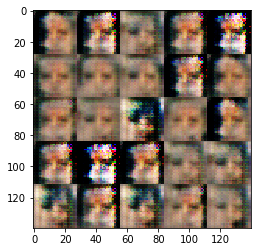

Epoch 1/1... Discriminator Loss: 0.4206... Generator Loss: 1.5588
Epoch 1/1... Discriminator Loss: 1.7716... Generator Loss: 3.3180
Epoch 1/1... Discriminator Loss: 0.7153... Generator Loss: 3.7774
Epoch 1/1... Discriminator Loss: 0.7197... Generator Loss: 1.0921
Epoch 1/1... Discriminator Loss: 1.5440... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 0.4814... Generator Loss: 1.4823
Epoch 1/1... Discriminator Loss: 0.5799... Generator Loss: 1.6433
Epoch 1/1... Discriminator Loss: 0.9989... Generator Loss: 2.3705
Epoch 1/1... Discriminator Loss: 1.0246... Generator Loss: 1.4495
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 0.4692


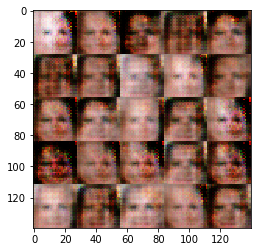

Epoch 1/1... Discriminator Loss: 0.6621... Generator Loss: 1.6033
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 2.3153
Epoch 1/1... Discriminator Loss: 0.2979... Generator Loss: 2.2361
Epoch 1/1... Discriminator Loss: 0.8441... Generator Loss: 1.3032
Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.4838
Epoch 1/1... Discriminator Loss: 1.0646... Generator Loss: 1.7328
Epoch 1/1... Discriminator Loss: 0.7534... Generator Loss: 1.1934
Epoch 1/1... Discriminator Loss: 1.2297... Generator Loss: 0.8208
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.5050
Epoch 1/1... Discriminator Loss: 1.1438... Generator Loss: 0.9023


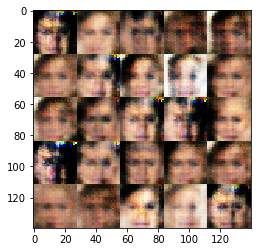

Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 0.8908
Epoch 1/1... Discriminator Loss: 1.6067... Generator Loss: 2.5017
Epoch 1/1... Discriminator Loss: 0.9686... Generator Loss: 2.0825
Epoch 1/1... Discriminator Loss: 1.5874... Generator Loss: 0.3000
Epoch 1/1... Discriminator Loss: 0.8392... Generator Loss: 1.0414
Epoch 1/1... Discriminator Loss: 1.0294... Generator Loss: 1.1908
Epoch 1/1... Discriminator Loss: 1.4440... Generator Loss: 0.9220
Epoch 1/1... Discriminator Loss: 0.8189... Generator Loss: 0.9951
Epoch 1/1... Discriminator Loss: 1.1173... Generator Loss: 1.6236
Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 0.6515


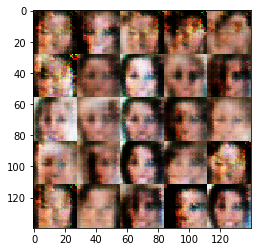

Epoch 1/1... Discriminator Loss: 0.8891... Generator Loss: 0.8247
Epoch 1/1... Discriminator Loss: 1.1144... Generator Loss: 0.8376
Epoch 1/1... Discriminator Loss: 0.6197... Generator Loss: 1.7518
Epoch 1/1... Discriminator Loss: 2.2537... Generator Loss: 0.1657
Epoch 1/1... Discriminator Loss: 1.2230... Generator Loss: 0.6459
Epoch 1/1... Discriminator Loss: 1.0359... Generator Loss: 1.1788
Epoch 1/1... Discriminator Loss: 1.4131... Generator Loss: 3.6563
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 2.5029
Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 0.5693
Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 0.5455


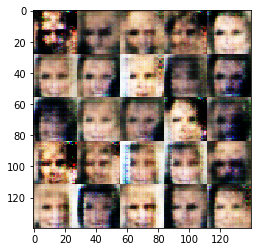

Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.5302
Epoch 1/1... Discriminator Loss: 0.8522... Generator Loss: 1.5284
Epoch 1/1... Discriminator Loss: 1.1627... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 0.9866... Generator Loss: 0.6656
Epoch 1/1... Discriminator Loss: 0.7186... Generator Loss: 1.0698
Epoch 1/1... Discriminator Loss: 0.8577... Generator Loss: 1.7356
Epoch 1/1... Discriminator Loss: 0.8865... Generator Loss: 1.0401
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.9113
Epoch 1/1... Discriminator Loss: 0.8284... Generator Loss: 1.9545
Epoch 1/1... Discriminator Loss: 1.0833... Generator Loss: 0.8230


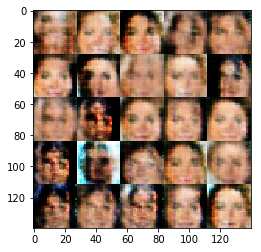

Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 0.9663... Generator Loss: 1.3121
Epoch 1/1... Discriminator Loss: 3.8936... Generator Loss: 5.3094
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 0.9180
Epoch 1/1... Discriminator Loss: 1.0075... Generator Loss: 1.2901
Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 0.9815
Epoch 1/1... Discriminator Loss: 0.9314... Generator Loss: 1.1327
Epoch 1/1... Discriminator Loss: 1.5753... Generator Loss: 0.4016
Epoch 1/1... Discriminator Loss: 1.7031... Generator Loss: 0.3117
Epoch 1/1... Discriminator Loss: 0.9318... Generator Loss: 1.3579


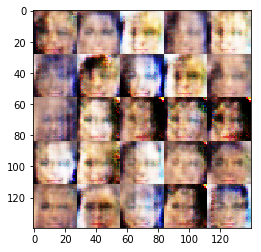

Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 1.7917
Epoch 1/1... Discriminator Loss: 1.3527... Generator Loss: 1.8635
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 1.0077... Generator Loss: 1.1205
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 0.8444
Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 0.6206
Epoch 1/1... Discriminator Loss: 1.2296... Generator Loss: 1.3659
Epoch 1/1... Discriminator Loss: 0.7584... Generator Loss: 0.8562
Epoch 1/1... Discriminator Loss: 0.9181... Generator Loss: 1.1199
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 1.3852


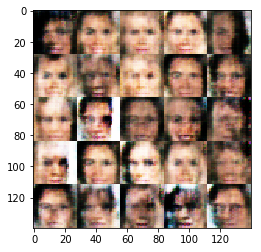

Epoch 1/1... Discriminator Loss: 0.7070... Generator Loss: 1.7051
Epoch 1/1... Discriminator Loss: 1.0966... Generator Loss: 0.6074
Epoch 1/1... Discriminator Loss: 1.1790... Generator Loss: 1.0156
Epoch 1/1... Discriminator Loss: 0.6351... Generator Loss: 1.6920
Epoch 1/1... Discriminator Loss: 1.4444... Generator Loss: 2.9992
Epoch 1/1... Discriminator Loss: 1.4802... Generator Loss: 0.4572
Epoch 1/1... Discriminator Loss: 1.0036... Generator Loss: 0.9013
Epoch 1/1... Discriminator Loss: 0.5940... Generator Loss: 1.3569
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.9231
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.6434


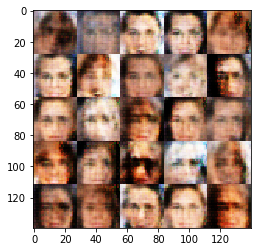

Epoch 1/1... Discriminator Loss: 1.2577... Generator Loss: 1.2944
Epoch 1/1... Discriminator Loss: 0.8668... Generator Loss: 1.5306
Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 0.8508... Generator Loss: 1.3612
Epoch 1/1... Discriminator Loss: 0.7916... Generator Loss: 0.8080
Epoch 1/1... Discriminator Loss: 2.8607... Generator Loss: 4.5094
Epoch 1/1... Discriminator Loss: 1.1596... Generator Loss: 0.5869
Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.6648... Generator Loss: 0.3875
Epoch 1/1... Discriminator Loss: 0.6885... Generator Loss: 1.5819


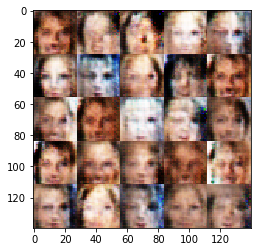

Epoch 1/1... Discriminator Loss: 1.0065... Generator Loss: 2.3427
Epoch 1/1... Discriminator Loss: 1.4917... Generator Loss: 2.5739
Epoch 1/1... Discriminator Loss: 1.2286... Generator Loss: 1.4715
Epoch 1/1... Discriminator Loss: 0.9097... Generator Loss: 1.9641
Epoch 1/1... Discriminator Loss: 1.0797... Generator Loss: 0.7832
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 2.4663
Epoch 1/1... Discriminator Loss: 1.0176... Generator Loss: 1.7807
Epoch 1/1... Discriminator Loss: 0.8261... Generator Loss: 1.2806
Epoch 1/1... Discriminator Loss: 1.1246... Generator Loss: 1.2815
Epoch 1/1... Discriminator Loss: 0.7826... Generator Loss: 1.2827


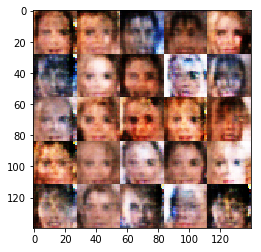

Epoch 1/1... Discriminator Loss: 1.5342... Generator Loss: 0.3830
Epoch 1/1... Discriminator Loss: 0.9265... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 0.8652... Generator Loss: 1.1895
Epoch 1/1... Discriminator Loss: 0.5252... Generator Loss: 1.5704
Epoch 1/1... Discriminator Loss: 1.0575... Generator Loss: 0.9017
Epoch 1/1... Discriminator Loss: 1.0478... Generator Loss: 1.3948
Epoch 1/1... Discriminator Loss: 1.0763... Generator Loss: 1.0476
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.0481... Generator Loss: 0.8312
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 0.6836


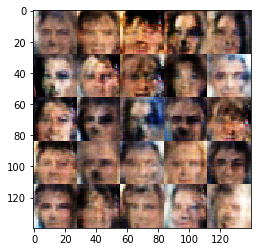

Epoch 1/1... Discriminator Loss: 0.9206... Generator Loss: 0.9270
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 1.0785
Epoch 1/1... Discriminator Loss: 1.4979... Generator Loss: 1.9719
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 0.7513
Epoch 1/1... Discriminator Loss: 1.2280... Generator Loss: 0.8639
Epoch 1/1... Discriminator Loss: 1.1552... Generator Loss: 0.5811
Epoch 1/1... Discriminator Loss: 0.9969... Generator Loss: 1.2228
Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 0.7139
Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 1.2315
Epoch 1/1... Discriminator Loss: 0.9560... Generator Loss: 1.6071


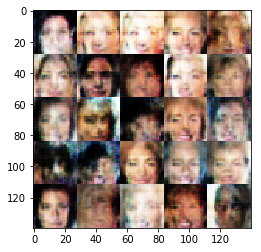

Epoch 1/1... Discriminator Loss: 1.0312... Generator Loss: 0.9907
Epoch 1/1... Discriminator Loss: 0.9201... Generator Loss: 1.0902
Epoch 1/1... Discriminator Loss: 0.9067... Generator Loss: 1.0336
Epoch 1/1... Discriminator Loss: 0.9454... Generator Loss: 1.0911
Epoch 1/1... Discriminator Loss: 0.9134... Generator Loss: 1.4047
Epoch 1/1... Discriminator Loss: 0.6988... Generator Loss: 1.0477
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 1.0608
Epoch 1/1... Discriminator Loss: 0.5776... Generator Loss: 2.3145
Epoch 1/1... Discriminator Loss: 1.0115... Generator Loss: 0.8895
Epoch 1/1... Discriminator Loss: 0.9068... Generator Loss: 1.0238


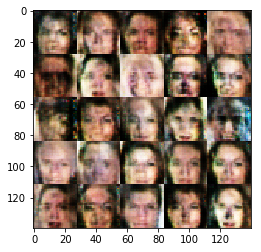

Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.6119
Epoch 1/1... Discriminator Loss: 1.1314... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 0.7513... Generator Loss: 1.0106
Epoch 1/1... Discriminator Loss: 0.7430... Generator Loss: 1.2672
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.5525
Epoch 1/1... Discriminator Loss: 1.1706... Generator Loss: 0.7349
Epoch 1/1... Discriminator Loss: 0.9247... Generator Loss: 0.7580
Epoch 1/1... Discriminator Loss: 0.7392... Generator Loss: 2.2785
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 0.8220
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 1.3655


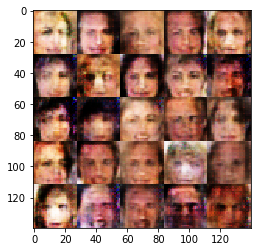

Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 1.8462
Epoch 1/1... Discriminator Loss: 0.7774... Generator Loss: 1.5409
Epoch 1/1... Discriminator Loss: 1.0510... Generator Loss: 0.7036
Epoch 1/1... Discriminator Loss: 0.8454... Generator Loss: 1.6506
Epoch 1/1... Discriminator Loss: 0.9018... Generator Loss: 0.7767
Epoch 1/1... Discriminator Loss: 0.5912... Generator Loss: 1.3201
Epoch 1/1... Discriminator Loss: 0.9980... Generator Loss: 1.0493
Epoch 1/1... Discriminator Loss: 0.9866... Generator Loss: 1.0590
Epoch 1/1... Discriminator Loss: 0.7854... Generator Loss: 1.4847
Epoch 1/1... Discriminator Loss: 0.9837... Generator Loss: 0.9464


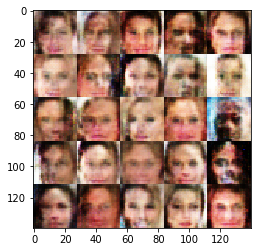

Epoch 1/1... Discriminator Loss: 0.8517... Generator Loss: 0.9654
Epoch 1/1... Discriminator Loss: 0.8635... Generator Loss: 1.1127
Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 1.1282
Epoch 1/1... Discriminator Loss: 0.6302... Generator Loss: 1.4086
Epoch 1/1... Discriminator Loss: 1.5505... Generator Loss: 0.4118
Epoch 1/1... Discriminator Loss: 1.2147... Generator Loss: 0.7370
Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.2895... Generator Loss: 0.5507
Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 0.8970
Epoch 1/1... Discriminator Loss: 1.0132... Generator Loss: 0.9190


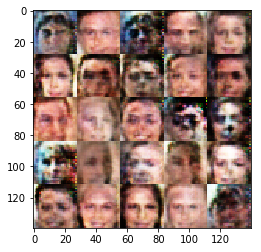

Epoch 1/1... Discriminator Loss: 0.8581... Generator Loss: 0.8799
Epoch 1/1... Discriminator Loss: 1.1067... Generator Loss: 0.9670
Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.2754... Generator Loss: 0.6206
Epoch 1/1... Discriminator Loss: 0.6838... Generator Loss: 1.5868
Epoch 1/1... Discriminator Loss: 0.7455... Generator Loss: 2.0441
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 1.4141
Epoch 1/1... Discriminator Loss: 0.7530... Generator Loss: 1.2680
Epoch 1/1... Discriminator Loss: 1.0630... Generator Loss: 1.0073
Epoch 1/1... Discriminator Loss: 0.8571... Generator Loss: 1.3744


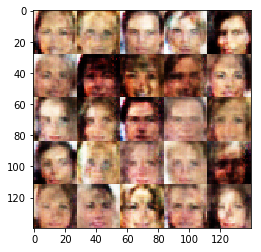

Epoch 1/1... Discriminator Loss: 1.1958... Generator Loss: 0.4901
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 1.8745
Epoch 1/1... Discriminator Loss: 0.7249... Generator Loss: 1.1014
Epoch 1/1... Discriminator Loss: 1.7685... Generator Loss: 2.2217
Epoch 1/1... Discriminator Loss: 0.9030... Generator Loss: 0.9745
Epoch 1/1... Discriminator Loss: 0.8091... Generator Loss: 1.5490
Epoch 1/1... Discriminator Loss: 0.3619... Generator Loss: 2.1291
Epoch 1/1... Discriminator Loss: 0.7381... Generator Loss: 1.4440
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.4241
Epoch 1/1... Discriminator Loss: 1.0198... Generator Loss: 0.8314


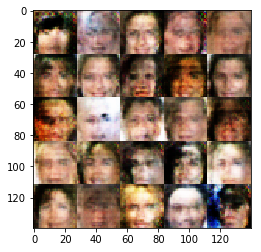

Epoch 1/1... Discriminator Loss: 0.9768... Generator Loss: 0.7989
Epoch 1/1... Discriminator Loss: 1.4786... Generator Loss: 1.7768
Epoch 1/1... Discriminator Loss: 0.9842... Generator Loss: 0.8960
Epoch 1/1... Discriminator Loss: 0.8933... Generator Loss: 0.9656
Epoch 1/1... Discriminator Loss: 0.6692... Generator Loss: 1.2946
Epoch 1/1... Discriminator Loss: 1.1291... Generator Loss: 0.5481
Epoch 1/1... Discriminator Loss: 2.1679... Generator Loss: 0.1937
Epoch 1/1... Discriminator Loss: 0.4438... Generator Loss: 2.1394
Epoch 1/1... Discriminator Loss: 0.9548... Generator Loss: 0.9362
Epoch 1/1... Discriminator Loss: 0.8809... Generator Loss: 0.9307


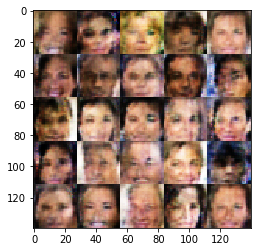

Epoch 1/1... Discriminator Loss: 1.4914... Generator Loss: 0.3820
Epoch 1/1... Discriminator Loss: 0.6162... Generator Loss: 1.1953
Epoch 1/1... Discriminator Loss: 0.7688... Generator Loss: 1.6605
Epoch 1/1... Discriminator Loss: 0.9055... Generator Loss: 1.1008
Epoch 1/1... Discriminator Loss: 1.0187... Generator Loss: 1.2056
Epoch 1/1... Discriminator Loss: 1.1510... Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.4925
Epoch 1/1... Discriminator Loss: 0.8985... Generator Loss: 1.1783
Epoch 1/1... Discriminator Loss: 0.9560... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 1.5146... Generator Loss: 2.0307


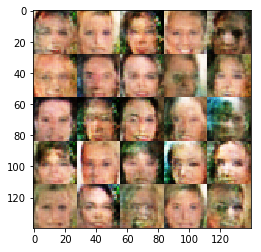

Epoch 1/1... Discriminator Loss: 1.4716... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.2931... Generator Loss: 0.8157
Epoch 1/1... Discriminator Loss: 1.0539... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 0.4558... Generator Loss: 1.3566
Epoch 1/1... Discriminator Loss: 1.1942... Generator Loss: 1.4068
Epoch 1/1... Discriminator Loss: 0.6626... Generator Loss: 2.7593
Epoch 1/1... Discriminator Loss: 2.1438... Generator Loss: 0.1838
Epoch 1/1... Discriminator Loss: 1.1394... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.1583... Generator Loss: 0.9698
Epoch 1/1... Discriminator Loss: 1.1709... Generator Loss: 1.2192


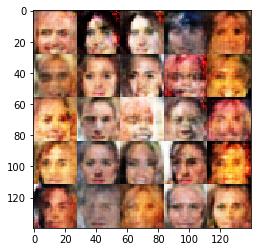

Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.5675
Epoch 1/1... Discriminator Loss: 1.0551... Generator Loss: 1.4234
Epoch 1/1... Discriminator Loss: 0.6665... Generator Loss: 1.0841
Epoch 1/1... Discriminator Loss: 1.2300... Generator Loss: 0.5578
Epoch 1/1... Discriminator Loss: 0.8375... Generator Loss: 1.7565
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 1.2368
Epoch 1/1... Discriminator Loss: 1.0860... Generator Loss: 2.3069
Epoch 1/1... Discriminator Loss: 1.5149... Generator Loss: 1.6260
Epoch 1/1... Discriminator Loss: 0.6886... Generator Loss: 1.1744
Epoch 1/1... Discriminator Loss: 0.9134... Generator Loss: 1.3177


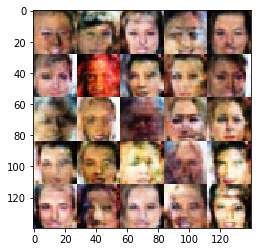

Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 1.3562
Epoch 1/1... Discriminator Loss: 1.1961... Generator Loss: 1.4423
Epoch 1/1... Discriminator Loss: 1.0357... Generator Loss: 1.5311
Epoch 1/1... Discriminator Loss: 0.8781... Generator Loss: 0.8724
Epoch 1/1... Discriminator Loss: 0.5929... Generator Loss: 1.4287
Epoch 1/1... Discriminator Loss: 1.0862... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 0.8824... Generator Loss: 1.3666
Epoch 1/1... Discriminator Loss: 1.1416... Generator Loss: 0.6676
Epoch 1/1... Discriminator Loss: 0.8120... Generator Loss: 0.9643
Epoch 1/1... Discriminator Loss: 0.9858... Generator Loss: 0.8711


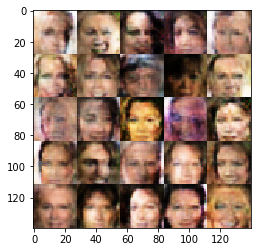

Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 2.1622
Epoch 1/1... Discriminator Loss: 1.0373... Generator Loss: 1.4852
Epoch 1/1... Discriminator Loss: 0.9398... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 0.8108... Generator Loss: 2.3382
Epoch 1/1... Discriminator Loss: 0.7330... Generator Loss: 1.2586
Epoch 1/1... Discriminator Loss: 0.3716... Generator Loss: 1.8757
Epoch 1/1... Discriminator Loss: 1.6003... Generator Loss: 0.3633
Epoch 1/1... Discriminator Loss: 0.8200... Generator Loss: 0.9851
Epoch 1/1... Discriminator Loss: 0.4524... Generator Loss: 1.9370
Epoch 1/1... Discriminator Loss: 1.1029... Generator Loss: 1.9969


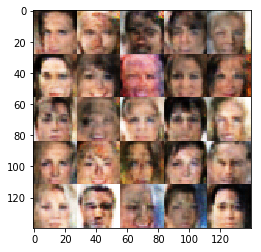

Epoch 1/1... Discriminator Loss: 1.0975... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 0.6109
Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.9343
Epoch 1/1... Discriminator Loss: 1.1061... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 0.5986
Epoch 1/1... Discriminator Loss: 1.0914... Generator Loss: 1.0391
Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.6620
Epoch 1/1... Discriminator Loss: 1.1143... Generator Loss: 0.7749
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 0.6629


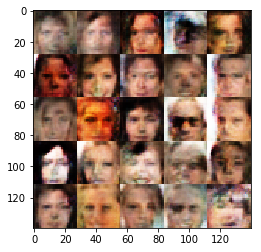

Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 0.6142
Epoch 1/1... Discriminator Loss: 0.9166... Generator Loss: 0.9679
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.5743
Epoch 1/1... Discriminator Loss: 1.0072... Generator Loss: 1.1490
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.6051
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 0.8352
Epoch 1/1... Discriminator Loss: 0.9103... Generator Loss: 0.8807
Epoch 1/1... Discriminator Loss: 1.5137... Generator Loss: 2.0804
Epoch 1/1... Discriminator Loss: 0.9452... Generator Loss: 0.8796
Epoch 1/1... Discriminator Loss: 1.2206... Generator Loss: 0.6310


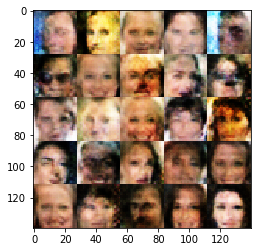

Epoch 1/1... Discriminator Loss: 1.1098... Generator Loss: 1.7542
Epoch 1/1... Discriminator Loss: 1.0134... Generator Loss: 1.6912
Epoch 1/1... Discriminator Loss: 0.8975... Generator Loss: 0.8775
Epoch 1/1... Discriminator Loss: 0.5864... Generator Loss: 1.8709
Epoch 1/1... Discriminator Loss: 1.1553... Generator Loss: 3.8961
Epoch 1/1... Discriminator Loss: 1.0378... Generator Loss: 1.4226
Epoch 1/1... Discriminator Loss: 1.0147... Generator Loss: 1.2239
Epoch 1/1... Discriminator Loss: 1.0281... Generator Loss: 0.8846
Epoch 1/1... Discriminator Loss: 1.2225... Generator Loss: 0.8781
Epoch 1/1... Discriminator Loss: 1.0949... Generator Loss: 0.6343


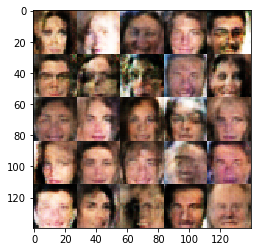

Epoch 1/1... Discriminator Loss: 1.1519... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 0.9640... Generator Loss: 0.8839
Epoch 1/1... Discriminator Loss: 1.0428... Generator Loss: 1.0638
Epoch 1/1... Discriminator Loss: 1.0928... Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.1075... Generator Loss: 0.9863
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.2115... Generator Loss: 1.6039
Epoch 1/1... Discriminator Loss: 1.0491... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 0.9477... Generator Loss: 0.9705
Epoch 1/1... Discriminator Loss: 0.9477... Generator Loss: 1.4120


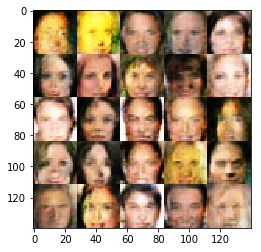

Epoch 1/1... Discriminator Loss: 1.0173... Generator Loss: 1.0303
Epoch 1/1... Discriminator Loss: 1.0593... Generator Loss: 0.6493
Epoch 1/1... Discriminator Loss: 0.9908... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 0.9387... Generator Loss: 0.9804
Epoch 1/1... Discriminator Loss: 1.5522... Generator Loss: 0.4581
Epoch 1/1... Discriminator Loss: 0.9709... Generator Loss: 0.9900


In [16]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.